In [24]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import glob
import folium

In [3]:
# List all files
files = glob.glob('*.csv')
files

['Field Survey Data_Format 1_Silage Cut Survey_2011-01-01_2011-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2012-01-01_2012-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2013-01-01_2013-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2014-01-01_2014-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2015-01-01_2015-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2016-01-01_2016-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2017-01-01_2017-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2018-01-01_2018-12-31.csv',
 'Field Survey Data_Format 1_Silage Cut Survey_2019-01-01_2019-12-31.csv']

In [7]:
# Join all datasets
files_concat = pd.concat([pd.read_csv(f) for f in files])
files_concat.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Flume,Sample_date,Sample_time,comments,Start_Sample_Date,GPS_Sample_Nr,Easting,Northing,Silage Dry Matter Yield (kg/ha),Silage Dry Matter Yield Quality,Silage Dry Matter Yield Quality Last Modified
0,NW558_SC1,68,NaN,Little Pecketsford,1,25/05/2011,12:00:00,Little Pecketsford,NaN,1,265701.2343,99027.88295,6220.02,Not set,04/01/2017
1,NW558_SC1,19,NaN,Pecketsford,1,25/05/2011,12:01:00,Pecketsford,NaN,2,265621.3570,99162.64359,8335.66,Not set,04/01/2017
2,NW558_SC1,19,NaN,Pecketsford,1,25/05/2011,12:02:00,Pecketsford,NaN,3,265637.3313,99038.38699,7116.73,Not set,04/01/2017
3,NW558_SC1,19,NaN,Pecketsford,1,25/05/2011,12:03:00,Pecketsford,NaN,4,265595.7734,99118.05719,7003.35,Not set,04/01/2017
4,NW558_SC1,19,NaN,Pecketsford,1,25/05/2011,12:04:00,Pecketsford,NaN,5,265615.0239,99241.73070,8485.22,Not set,04/01/2017


In [9]:
# Check field names
files_concat['Field'].unique()

array(['Little Pecketsford', 'Pecketsford', 'Great Field', 'Ware Park',
       'Top Burrows', 'Burrows', 'Bottom Burrows',
       'Orchard Dean, Orchard Dean North', 'Lower Wyke Moor',
       'Middle Wyke Moor', 'Dairy South', 'Dairy Corner', 'Poor Field',
       'Higher Wyke Moor', 'Burrows, Burrows', 'Golden Rove',
       'Bottom Burrows, Bottom Burrows',
       'Orchard Dean, Orchard Dean South', 'Dairy East', 'Lower Wheaty',
       'Dairy North', 'Longlands South', 'Longlands North',
       'Longlands East'], dtype=object)

In [18]:
# Select only Field 'Burrows'
fields = ['Burrows', 'Burrows, Burrows']
filesBurrows = files_concat[files_concat.Field.isin(fields)].reset_index(drop = True)
filesBurrows.drop(['SP_ID', 'sample_distance (m)', 'Start_Sample_Date', 'Silage Dry Matter Yield Quality Last Modified'], 
                  axis = 1, inplace = True)
filesBurrows.head()

,Experiment_Id,Field,Flume,Sample_date,Sample_time,comments,GPS_Sample_Nr,Easting,Northing,Silage Dry Matter Yield (kg/ha),Silage Dry Matter Yield Quality
0,NW558_SC1,Burrows,4,25/05/2011,12:01:00,Burrows,20,265555.2912,98391.25314,7449.53,Not set
1,NW558_SC1,Burrows,4,25/05/2011,12:02:00,Burrows,21,265592.1536,98314.89750,6059.88,Not set
2,NW558_SC1,Burrows,4,25/05/2011,12:03:00,Burrows,22,265678.8192,98259.63132,7009.69,Not set
3,NW558_SC1,Burrows,4,25/05/2011,12:04:00,Burrows,23,265742.8685,98240.71768,5927.21,Not set
4,NW558_SC1,Burrows,4,25/05/2011,12:05:00,Burrows,24,265694.5264,98413.41024,7060.46,Not set


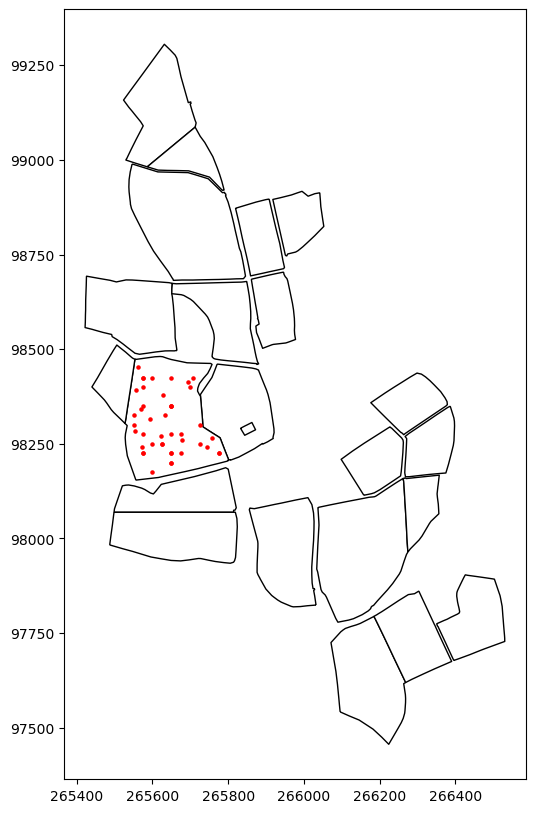

In [25]:
# Convert to geopandas dataframe and plot
burrows_gp = gp.GeoDataFrame(filesBurrows, geometry = gp.points_from_xy(filesBurrows.Easting, filesBurrows.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
burrows_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [27]:
# Check dates
filesBurrows['Sample_date'].unique()

array(['25/05/2011', '09/08/2011', '25/05/2012', '15/09/2014',
       '27/05/2015', '18/05/2017', '20/05/2019'], dtype=object)

In [36]:
# Group by dates and convert to g_m2
burrows_by_date = filesBurrows.groupby(['Sample_date']).mean().reset_index(drop = False)

burrows_by_date['silage_gm2'] = burrows_by_date['Silage Dry Matter Yield (kg/ha)']

,Sample_date,Easting,Northing,Silage Dry Matter Yield (kg/ha)
0,09/08/2011,265638.813671,98327.112300,4864.088571
1,15/09/2014,265642.857143,98271.428571,6418.445714
2,18/05/2017,265630.000000,98325.000000,6025.400000
3,20/05/2019,265595.000000,98295.000000,4882.400000
4,25/05/2011,265628.332929,98330.499007,6657.168571
5,25/05/2012,265642.857143,98271.428571,3851.197143
6,27/05/2015,265658.333333,98316.666667,5923.016667


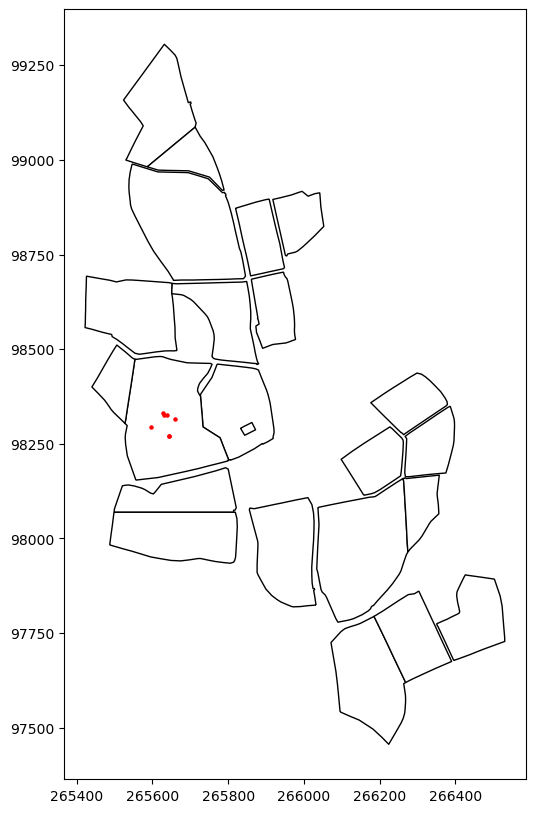

In [38]:
# Convert to geopandas dataframe and plot
burrows_by_date_gp = gp.GeoDataFrame(burrows_by_date, 
                                     geometry = gp.points_from_xy(burrows_by_date.Easting, burrows_by_date.Northing))
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
burrows_by_date_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [39]:
# Export
burrows_by_date.to_csv("burrows_by_date.csv", index = False)

486.4